<img src="images/title.png">

<img src="images/IFR_geometry.png" width=600>

In [1]:
using SpecialFunctions

In [2]:
besseljprime(ν, x) = (besselj(ν - 1, x) - besselj(ν + 1, x))/2

besseljprime (generic function with 1 method)

In [3]:
hankelh2prime(ν, x) = (hankelh2(ν - 1, x) - hankelh2(ν + 1, x))/2

hankelh2prime (generic function with 1 method)

<img src="images/IFRE.png" width=600>

In [78]:
function IFRE(w, α)
    # w is the support element width in wavelengths
    arg = π*w*cos(α)
    sum = besselj(0, arg)/hankelh2(0, arg)
    prev = 0.0 + 0.0im
    for i in 1:100 
        sum += besselj(i, arg)/hankelh2(i, arg) + besselj(-i, arg)/hankelh2(-i, arg)
        change = abs(sum)/abs(prev)
        change = change < 1.0 ? 1/change : change
#        println(@sprintf("%d %.6f", i, change))
        if change < (1.0 + 1e-9)
            break
        end
        prev = sum
    end
    return -sum/arg
end
    
        
        

IFRE (generic function with 1 method)

<img src="images/IFRH.png" width=600>

In [89]:
function IFRH(w, α)
    # w is the support element width in wavelengths
    arg = π*w*cos(α)
    sum = besseljprime(0, arg)/hankelh2prime(0, arg)
    prev = 0.0 + 0.0im
    for i in 1:100 
        sum += besseljprime(i, arg)/hankelh2prime(i, arg) + besseljprime(-i, arg)/hankelh2prime(-i, arg)
        change = abs(sum)/abs(prev)
        change = change < 1.0 ? 1/change : change
#        println(@sprintf("%d %.6f", i, change))
        if change < (1.0 + 1e-9)
            break
        end
        prev = sum
    end
    return -sum/arg
end


IFRH (generic function with 1 method)

In [90]:
using Plots; gr();

In [91]:
we = logspace(log10(0.2), log10(20), 200);wh = logspace(log10(0.02), log10(20), 300);

In [92]:
ifre = IFRE.(we, 0.0); ifrh = IFRH.(wh, 0.0);

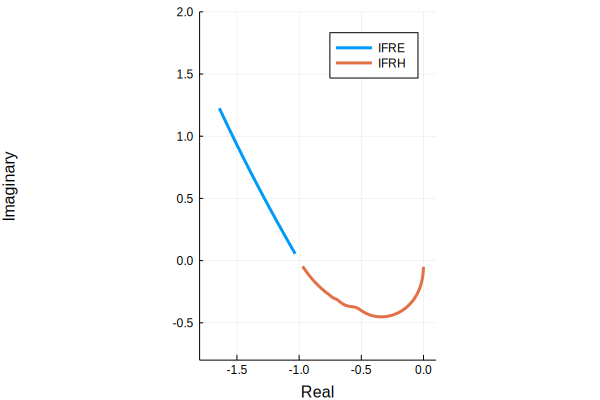

In [95]:
plot(real(ifre), imag(ifre), linewidth = 3, aspect_ratio = :equal, label="IFRE");
plot!(real(ifrh), imag(ifrh), linewidth = 3, aspect_ratio = :equal, label="IFRH");
xaxis!("Real"); yaxis!("Imaginary"); xlims!(-1.8, 0.1); ylims!(-0.8, 2)

Close enough:

<img align=left width=300 src="images/IFRplot.png">

In [10]:
gaussian_taper(r, width, taper) = exp(-r^2*log(taper)/-width^2)

gaussian_taper (generic function with 1 method)

In [11]:
gaussian_taper(5,10,0.001)

0.1778279410038923

In [15]:
#plot(linspace(0,10,500), 10*log10.(gaussian_taper.(linspace(0,10,500), 10, 0.001)))

integral_0^1 exp(-(((x1 - x0) t + x0)^2 + ((y1 - y0) t + y0)^2)/k) dt = (sqrt(π) sqrt(k) (erf((-x0 x1 + x1^2 - y0 y1 + y1^2)/(sqrt(k) sqrt((x0 - x1)^2 + (y0 - y1)^2))) - erf((-x0^2 + x0 x1 + y0 (y1 - y0))/(sqrt(k) sqrt((x0 - x1)^2 + (y0 - y1)^2)))) exp(-(x1 y0 - x0 y1)^2/(k ((x0 - x1)^2 + (y0 - y1)^2))))/(2 sqrt((x0 - x1)^2 + (y0 - y1)^2))

(Sqrt[k] Sqrt[Pi] (Erf[(-(x0 x1) + x1^2 - y0 y1 + y1^2)/(Sqrt[k] Sqrt[(x0 - x1)^2 + (y0 - y1)^2])] - Erf[(-x0^2 + x0 x1 + y0 (-y0 + y1))/(Sqrt[k] Sqrt[(x0 - x1)^2 + (y0 - y1)^2])]))/(2 E^((x1 y0 - x0 y1)^2/(k ((x0 - x1)^2 + (y0 - y1)^2))) Sqrt[(x0 - x1)^2 + (y0 - y1)^2])

$$\int_0^1 \exp{\biggl(-\frac{((x_1 - x_0) t + x_0)^2 + ((y_1 - y_0) t + y_0)^2}{k}}\biggr) \mathrm{dt} =$$

$$\biggl[ \sqrt{\pi k} \biggl(\mathrm{erf}\biggl(\frac{x_1^2 - x_0 x_1 - y_1(y_0 - y_1)}{ \sqrt{k((x_0 - x_1)^2 + (y_0 - y_1)^2)}}\biggr) - \mathrm{erf}\biggl(\frac{-x_0^2 + x_0 x_1 + y_0 (y_1 - y_0)}{\sqrt{k((x_0 - x_1)^2 + (y_0 - y_1)^2)}}\biggr)\biggr) \exp\biggl(\frac{-(x_1 y_0 - x_0 y_1)^2}{k ((x_0 - x_1)^2 + (y_0 - y_1)^2)}\biggr)\biggr] \bigg/2 \sqrt{(x_0 - x_1)^2 + (y_0 - y_1)^2}$$


In [1]:
    function integrated_taper(x₀, x₁, y₀, y₁, t, k)
        d² = (x₀ - x₁)^2 + (y₀ - y₁)^2
        kd² = k*d²
        sqrtkd² = sqrt(kd²)
        i = (sqrt(π*k)*(
            erf((x₁^2 - x₀*x₁ - y₁*(y₀-y₁))/sqrtkd²) - 
            erf((-x₀^2 + x₀*x₁ + y₀*(y₁ - y₀))/sqrtkd²))*exp(-(x₁*y₀ - x₀*y₁)^2/kd²))/(2*sqrt(d²))
        return i
    end

integrated_taper (generic function with 1 method)

In [16]:
function read_wrl_data(filename)
    f = open(filename)
    coord = Float64[]
    index = Int64[]
    state = :None
    for ln in eachline(f)
        if contains(ln, "Coordinate")
            state = :Coord
        elseif contains(ln, "Index")
            state = :Index
        end
    
        if state == :Coord
            m = matchall(r"([-+]?[0-9]*\.?[0-9]+([eE][-+]?[0-9]+)?)", ln)
            if length(m) == 3
                push!(coord, parse.(Float64, m)...)
            end
        elseif state == :Index
            m = match(r"(\d+) (\d+) -1,",ln)
            if typeof(m) == RegexMatch && length(m.captures) == 2
                push!(index, parse.(Int64, m.captures)...)
            end
        end
    end
    close(f)
    coord = reshape(coord, 3, length(coord)÷3)
    index = reshape(index, 2, length(index)÷2)
    return(coord, index)
end

read_wrl_data (generic function with 1 method)

In [101]:
coord, ind = read_wrl_data("foo.wrl")

LoadError: [91mUndefVarError: read_wrl_data not defined[39m

In [28]:
segments = Array{Float64,2}[]
for i in 1:size(ind,2)
    push!(segments, hcat(coord[:, ind[1,i]+1],coord[:, ind[2,i]+1]))
end


In [29]:
ind

2×480 Array{Int64,2}:
  91   0   81  71  76  117  71   9  …  141  141   84  38  38   74  143  60
 119  47  113  75  77  150  72  49     144  142  118  45  41  146  149  61

In [30]:
segments[6]

3×2 Array{Float64,2}:
 -0.688191  -0.638197
  0.5        0.262866
 -0.525731  -0.723607

In [31]:
segments[6][3,1]

-0.525731112119

In [32]:
using PyPlot; pygui(true)

true

In [33]:
for s in segments
    if (s[3,1] < -0.1) || (s[3,2] < -0.1)
        continue
    end
#    text3D(c[1, i[1,n]+1], c[2, i[1,n]+1], c[3, i[1,n]+1], @sprintf("%d", i[1,n]))
    plot3D(s[1,:], s[2,:], s[3,:], color="green")
end


In [34]:
using Rotations

In [35]:
RotXYZ(-0.5,0.3,1.1)*[1,3,3]

3-element SVector{3,Float64}:
 -1.23431
  3.66488
  2.01124

In [36]:
using Distances

Circle - line segment intersection

https://math.stackexchange.com/a/311956

In [ ]:
struct Point
    x::Float64
    y::Float64
end

In [2]:
struct Intersection
    p::Point
    t::Float64
    validity::Bool
end

In [ ]:
function is_inside_circle(point::Point, center::Point, radius)
    return radius^2 > (point.x - center.x)^2 + (point.y - center.y)^2
end

In [3]:
function circle_vector_intersection(h, k, r, p₀::Point, p₁::Point)
    a = (p₀.x - p₁.x)^2 + (p₀.y - p₁.y)^2
b = 2*(p₁.x − p₀.x)*(p₀.x − h) + 2*(p₁.y − p₀.y)*(p₀.y − k)
    c = (p₀.x − h)^2 + (p₀.y − k)^2 − r^2
    Δ = b^2 - 4*a*c
    if Δ > 0 
        t1 = (-b + sqrt(Δ))/(2*a)
        t2 = (-b - sqrt(Δ))/(2*a)
        
    else
        return Intersection(0.0, 0.0, 0.0, false)
    end


    t = −b  ±b2−4ac‾‾‾‾‾‾‾‾√2a

LoadError: [91msyntax: invalid character "−"[39m

In [37]:
segments[1]

3×2 Array{Float64,2}:
 -0.687157  -0.809017   
 -0.681718  -0.587785   
  0.251148  -3.43078e-17

In [54]:
@time evaluate(Euclidean(),segments[10][:,2], zeros(3))

  0.000122 seconds (9 allocations: 432 bytes)


1.0000000000002973

In [50]:
using BenchmarkTools

In [55]:
@time sqrt(sum(abs2,segments[10][:,2]))

  0.000023 seconds (8 allocations: 320 bytes)


1.0000000000002973

In [ ]:
rotated = Array{Float64,2}[]
for s in segments
    rotated_mat = similar(s)
    rotated_mat[:,1] = RotXYZ(a,b,c)*s[:,1]
    rotated_mat[:,2] = RotXYZ(a,b,c)*s[:,2]
    if rotated_mat[3,1] > 0 && rotated_mat[3,2] > 0
        #sum(abs2, (I.I .- ctr)
        #subr
        #rim
        push!(rotated, rotated_mat)
    end
end

In [ ]:
# within circle

<img src="images/loss.png">

<img src="images/subreflector.png">

<img src="images/IFReffect.png">

<img src="images/illumination_weight.png">

<img src="images/CP.png">